In [1]:
import pandas as pd
from pandas import read_csv
#from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

## Exploratory Data Analysis

In [3]:
url = 'https://raw.githubusercontent.com/Jneny/Hospitalcapacity/main/Data/icu_beds.csv'
data = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)

In [8]:
#bringing focus back on main variable
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
# adultcrit.head()

NameError: name 'summary' is not defined

# Stationarity check 

In [15]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(adultcrit.adult_icu_crci_patients.values)

(-2.415029400292792,
 0.1375393258204049,
 17,
 637,
 {'1%': -3.44065745275905,
  '5%': -2.8660879520543534,
  '10%': -2.5691919933016076},
 4278.403262572921)

In [7]:
#Null hypothesis is that H0= non-stationary
adfuller_result = adfuller(adultcrit.adult_icu_crci_patients.values, autolag = 'AIC')

print (f'ADF Stat: {adfuller_result[0]}')
print (f'p-value: {adfuller_result[1]}')

for k, v in adfuller_result[4].items():
    print('Critical Value:')
    print(f'{k}, {v}')
#DickeyFuller shows data is not stationary

ADF Stat: -2.415029400292792
p-value: 0.1375393258204049
Critical Value:
1%, -3.44065745275905
Critical Value:
5%, -2.8660879520543534
Critical Value:
10%, -2.5691919933016076


## Making Stationary

In [10]:
size = int(len(adultcrit)*.8)
adtrain = adultcrit.iloc[:size]
adtest = adultcrit.iloc[size:]

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

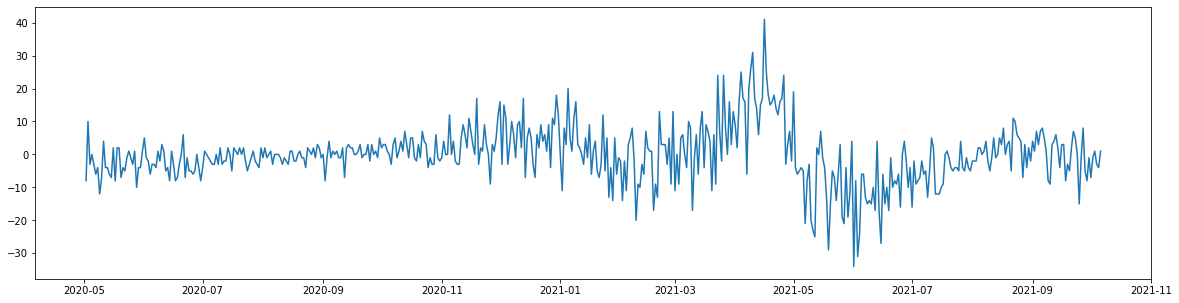

In [13]:
adcdiff = adtrain.adult_icu_crci_patients.diff(1)
plt.plot(adcdiff)

In [16]:
adfuller(adcdiff.dropna())

(-3.195009606966157,
 0.020275366078131317,
 16,
 506,
 {'1%': -3.443339692005083,
  '5%': -2.8672689011327894,
  '10%': -2.569821287318971},
 3342.9429689854946)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
model_order1 = ARIMA(adcdiff[1:], order = (1,1,1), freq = 'd')
results_order1 = model_order1.fit()
results_order1.summary()

NameError: name 'ARIMA' is not defined

In [21]:
!pip install pmdarima --user --no-warn-script-location

In [15]:
from platform import python_version

print(python_version())

3.7.4


In [16]:
import pmdarima from 'c:\users\jneny\appdata\roaming\python\python37\site-packages' as pm

SyntaxError: invalid syntax (Temp/ipykernel_11060/3156055865.py, line 1)

In [22]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [18]:
#autoarima only uses AIC

In [19]:
model_auto = auto_arima(adcdiff[1:])
model_auto.summary()
model_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date])),
                         index = df_test[start_date:end_date].index)

NameError: name 'auto_arima' is not defined

In [20]:
model_auto.plot(figsize = (20, 5), color = 'red')
df_test.adult_icu_crci_patients[start_date:end_date].plot(color = 'blue')
plt.title('Auto ARIMA Prediction vs Actual', size = 24)


NameError: name 'model_auto' is not defined